<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/1d_nf_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import torch.distributions as dist
import  matplotlib.pyplot as plt
import numpy as np
import torch

In [141]:
p_z = dist.Normal(0, 1)
z = p_z.sample((100,))

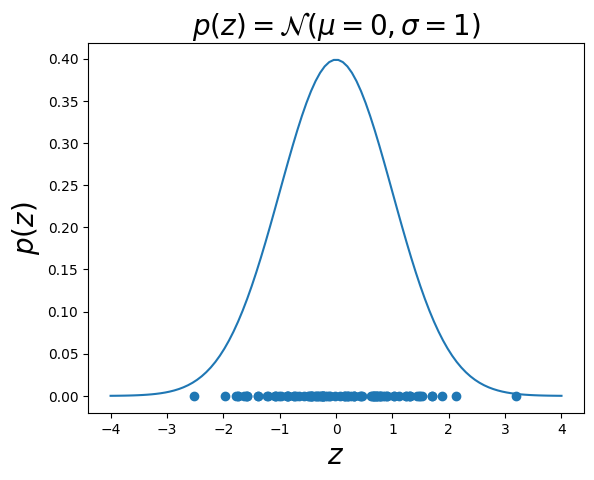

In [142]:
plt.scatter(z, [0 for i in range(len(z))])
plt.plot(torch.linspace(-4,4,100) , p_z.log_prob(torch.linspace(-4,4,100)).exp())


plt.xlabel("$z$", fontsize=20)
plt.ylabel("$p(z)$", fontsize=20)
plt.title("$p(z)=\mathcal{N}(\mu = 0, \sigma=1)$", fontsize=20)
plt.show()

Text(0, 0.5, '$p(x)$')

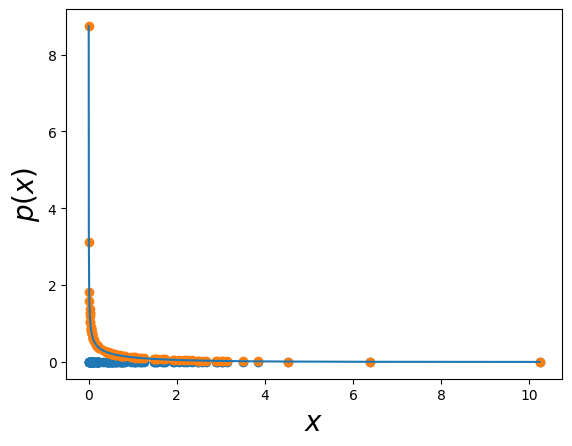

In [176]:
x = z**2

plt.scatter(x, [0 for i in range(len(x))])

p_x = p_z.log_prob(z).exp() * torch.abs(1/(2 * z))

plt.scatter(x, p_x)
plt.plot(torch.sort(x)[0], p_x[torch.sort(x)[1]])


plt.xlabel("$x$", fontsize=20)
plt.ylabel("$p(x)$", fontsize=20)

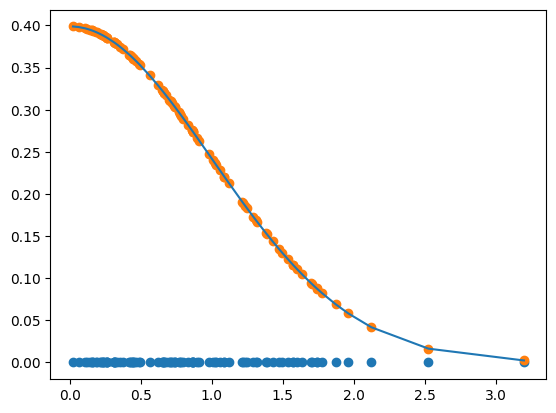

In [174]:
p_z_hat = p_x * torch.abs(2 * torch.sqrt(x))

plt.scatter(torch.sqrt(x), [0 for i in range(len(p_z_hat))])
plt.plot(torch.sort(torch.sqrt(x))[0], p_z_hat[torch.sort(torch.sqrt(x))[1]])
plt.scatter(torch.sort(torch.sqrt(x))[0], p_z_hat[torch.sort(torch.sqrt(x))[1]])

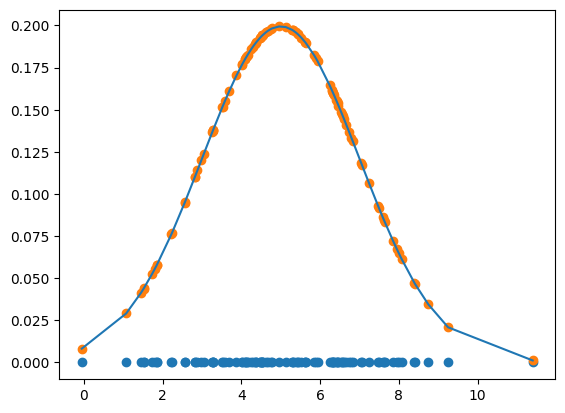

In [175]:
x = 2 * z + 5                                    # x = f(z) = 2 * z + 1

plt.scatter(x, [0 for i in range(len(x))])

p_x = p_z.log_prob(z).exp() * (1/2)
plt.scatter(x, p_x)
plt.plot(torch.sort(x)[0], p_x[torch.sort(x)[1]])


